In [56]:
#Importing libraries

In [57]:
import pandas as pd
import seaborn as sns
import scipy.stats 

In [58]:
#Data Reading

tips = pd.read_csv('Data/tips.csv')

In [59]:
#First Analysis: Total Bill x Dessert

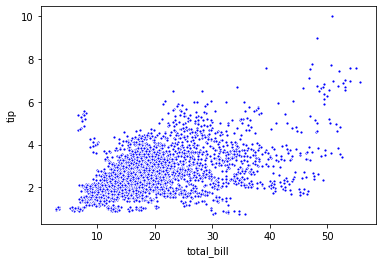

In [60]:
img_scatt_TipsXBill = sns.scatterplot(x='total_bill', y='tip', data=tips, marker='.',color='b')

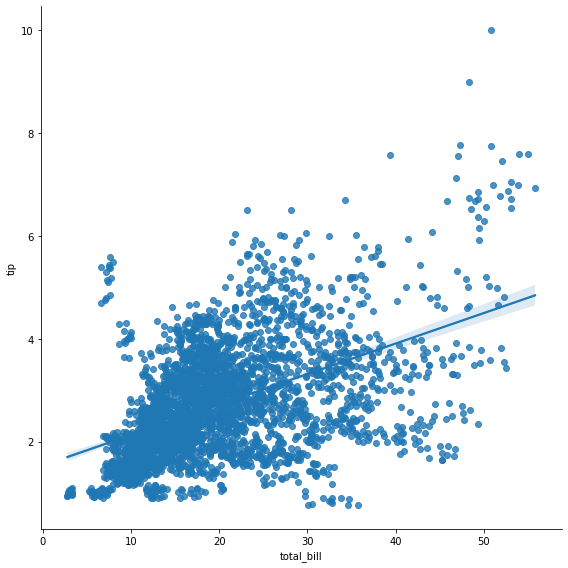

In [61]:
img_lm_TipsXBill = sns.lmplot(x='total_bill', y='tip', data=tips, height=8)

In [62]:
#including a tip percentage column in relation to the total bill

tips['percent'] = round(tips.tip/tips.total_bill*100,2)

In [63]:
#plot percent data

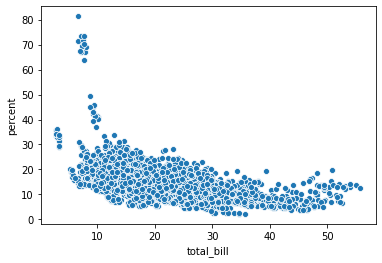

In [64]:
img_scatt_percenttip = sns.scatterplot(x='total_bill', y='percent', data=tips)

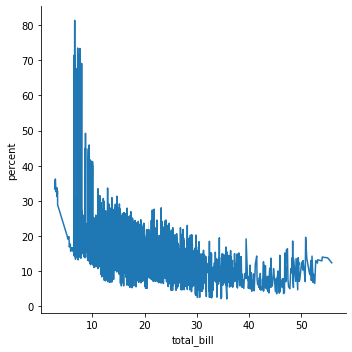

In [65]:
img_line_percentip = sns.relplot(x='total_bill', y='percent', kind='line',data=tips)

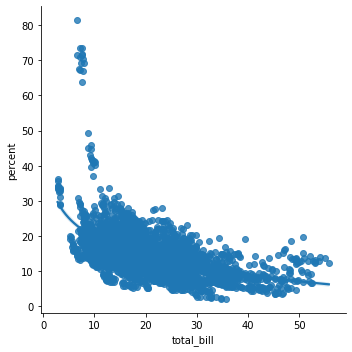

In [66]:
img_lm_percentip = sns.lmplot(x='total_bill', logx=True,y='percent',data=tips)

In [67]:
#Influence of dessert in the tip

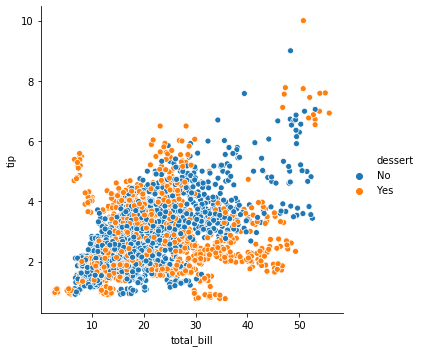

In [68]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=tips)

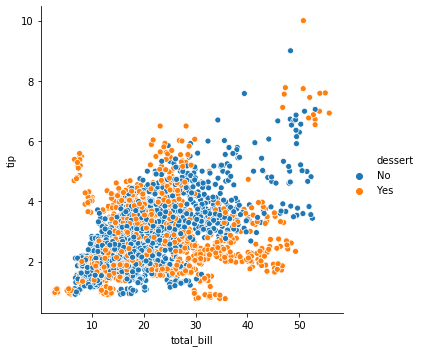

In [69]:
sns.relplot(x='total_bill', y='tip', hue='dessert', data=tips)

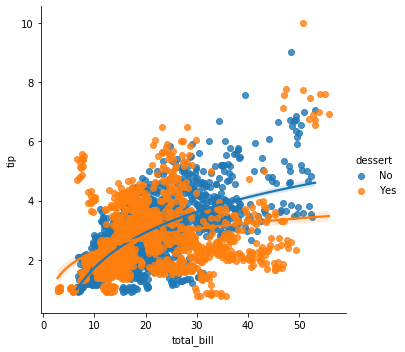

In [70]:
sns.lmplot(x='total_bill', y='tip', hue='dessert', data=tips, logx=True)

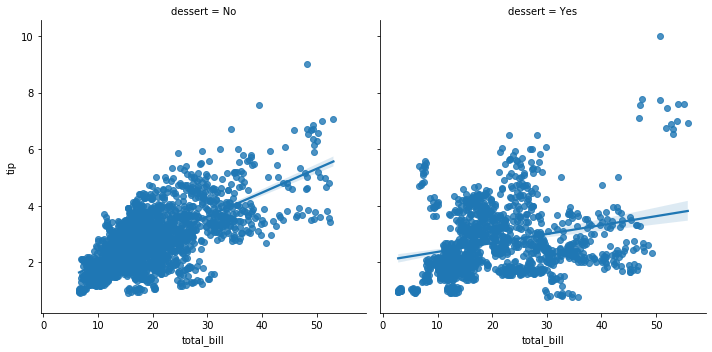

In [71]:
sns.lmplot(x='total_bill', y='tip', col='dessert', data=tips)

In [72]:
#######---WARNING, HIGTH PROCESSING COST TO PLOT THIS AMOUNT OF DATA----#####
## -->   sns.catplot(x='total_bill', y='tip', hue='dessert', data=tips)
#######-----------------------------------------------------------------#####

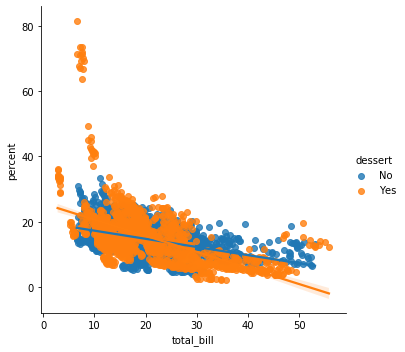

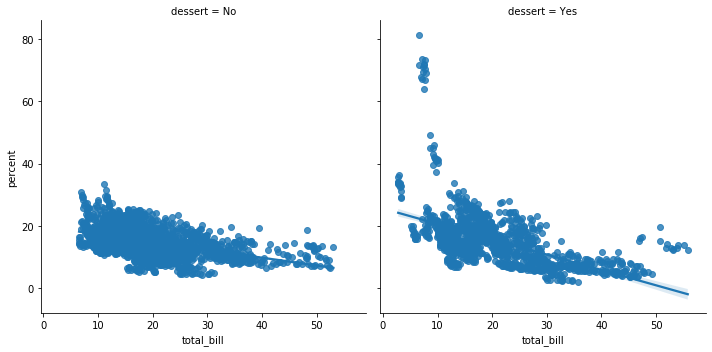

In [73]:
sns.lmplot(x='total_bill', y='percent', hue='dessert', data=tips)
sns.lmplot(x='total_bill', y='percent', col='dessert', data=tips)

In [74]:
#Usind Wilcoxon rank-sum( hypothesis that two sets of measurements are drawn from the same distribution)

In [75]:
dessert = tips.query("dessert == 'Yes'").percent 

no_dessert = tips.query("dessert == 'No'").percent 

In [76]:
if scipy.stats.ranksums(dessert, no_dessert).pvalue.round(2) <= 0.05:
    print('The value distribuition of dessert and no dessert groups are distinct')
    
else:
    print('There is no difference between the value distribuition of dessert and no dessert groups')


The value distribuition of dessert and no dessert groups are distinct


In [77]:
#Analysis of the influence of the day

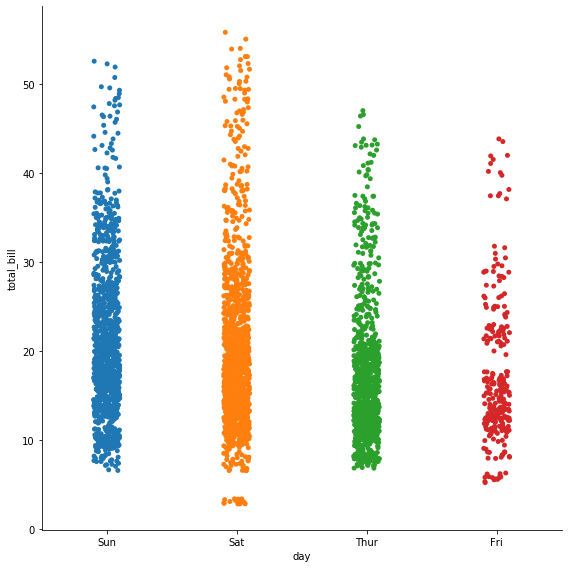

In [78]:
sns.catplot(x='day', y='total_bill', height=8,data=tips)

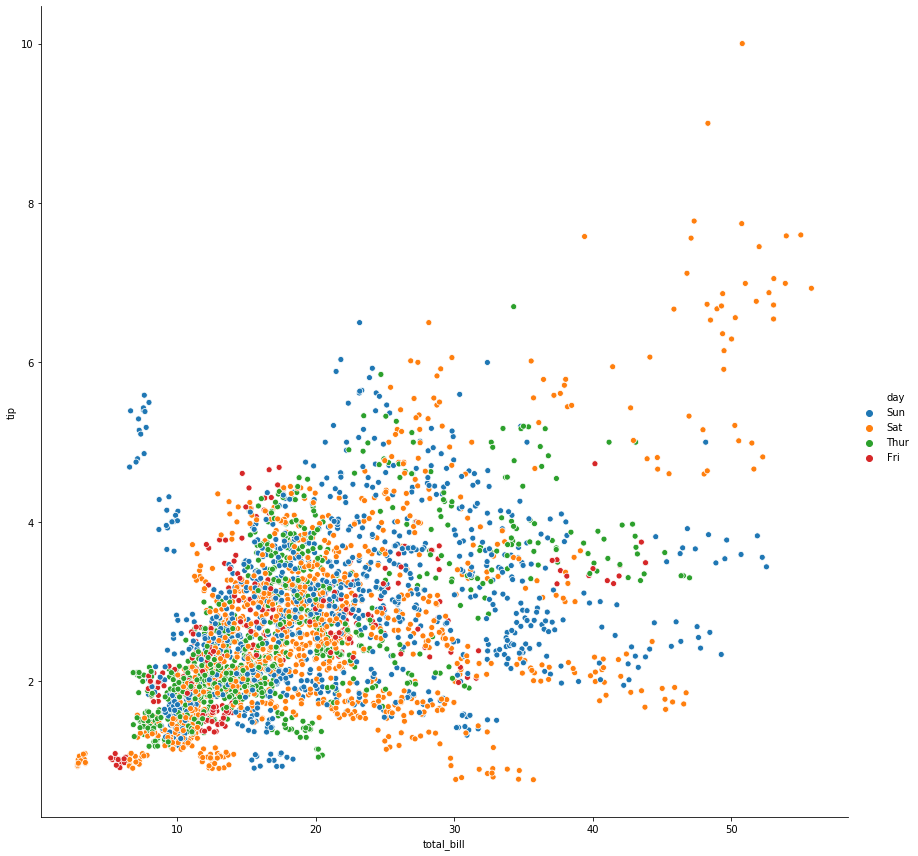

In [79]:
sns.relplot(x='total_bill', y= 'tip', hue='day', height=12,data=tips )

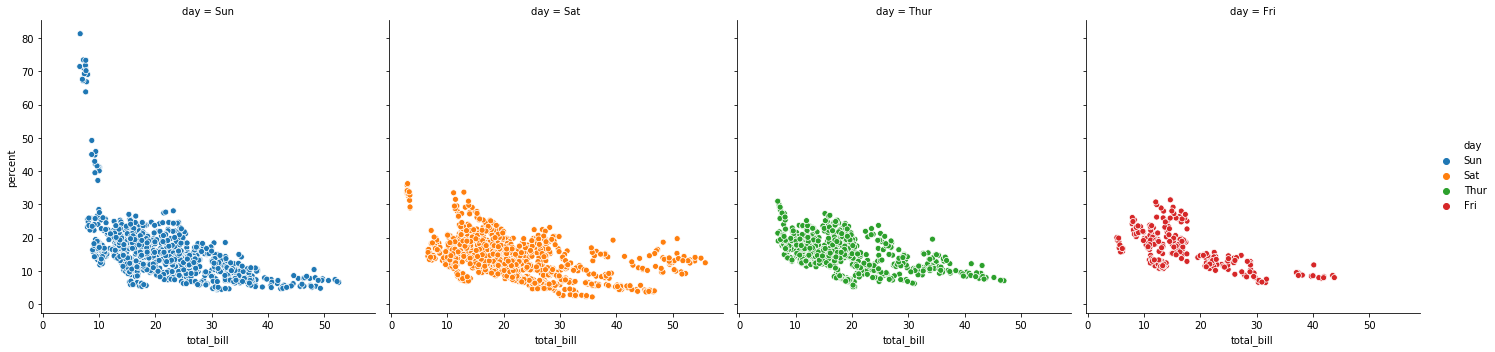

In [80]:
#Percent tip influeced by the day
sns.relplot(x='total_bill', y='percent', hue='day', col='day', data=tips)

Genaral mean of percent tip by total bill: 15.14%


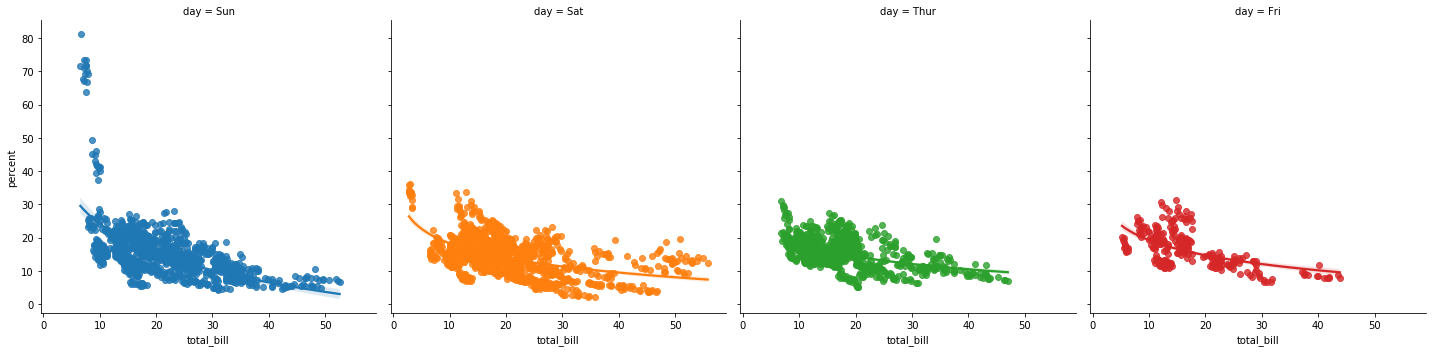

In [81]:
#Percentage tendence by day and total bill plus the genaral mean
sns.lmplot(x='total_bill', y='percent', hue='day', logx=True ,col='day',data=tips)
print('Genaral mean of percent tip by total bill: {}%' .format(round(tips.percent.mean(),2)))

In [82]:
#Table with the means total bill, tip and,percent tip by day
tips.groupby(['day']).mean()[['total_bill','tip','percent']].round(2)

,total_bill,tip,percent
day,,,
Fri,17.22,2.55,16.32
Sat,20.48,2.69,14.36
Sun,21.44,2.90,15.50
Thur,17.72,2.56,15.42


In [83]:
#Frequency by day
print('Day Frequency: ')
print(tips['day'].value_counts())

Day Frequency: 
Sat     1218
Sun     1064
Thur     868
Fri      266
Name: day, dtype: int64


In [84]:
#Usind Wilcoxon rank-sum for compare distribution by day
Fri = tips.query("day == 'Fri'").total_bill
Sat = tips.query("day == 'Sat'").total_bill
Sun = tips.query("day == 'Sun'").total_bill 
Thur = tips.query("day == 'Thur'").total_bill 

#Friday comparisons

def rank_day_comparisons(day1,day2):
    return scipy.stats.ranksums(day1, day2).pvalue.round(2)
    
if rank_day_comparisons(Fri,Sat) <= 0.05:
    print('The value distribuition of Friday and Saturday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Friday and Saturday groups')

if rank_day_comparisons(Fri,Sun) <= 0.05:
    print('The value distribuition of Friday and Sunday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Friday and Sunday groups')

if rank_day_comparisons(Fri,Thur) <= 0.05:
    print('The value distribuition of Friday and Tursday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Friday and Tursday groups')

#Saturday comparisons 

if rank_day_comparisons(Sat,Sun) <= 0.05:
    print('The value distribuition of Saturday and Sunday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Saturday and Sunday groups')
    
if rank_day_comparisons(Sat,Thur) <= 0.05:
    print('The value distribuition of Saturday and Tursday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Saturday and Tursday groups')

#Sunday comparison

if rank_day_comparisons(Sun,Thur) <= 0.05:
    print('The value distribuition of Sunday and Tursday groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Sunday and Tursday groups')




The value distribuition of Friday and Saturday groups are distinct
The value distribuition of Friday and Sunday groups are distinct
There is no difference between the value distribuition of Friday and Tursday groups
The value distribuition of Saturday and Sunday groups are distinct
The value distribuition of Saturday and Tursday groups are distinct
The value distribuition of Sunday and Tursday groups are distinct


In [85]:
#Analysis of the diference between lunch time and Dinner time

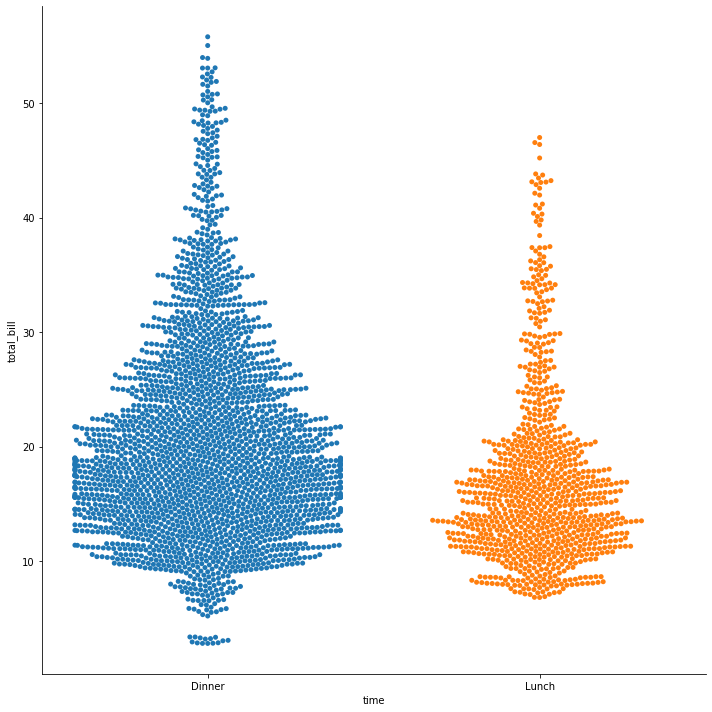

In [94]:
sns.catplot(x='time', y='total_bill', kind = 'swarm',height=10,data=tips)

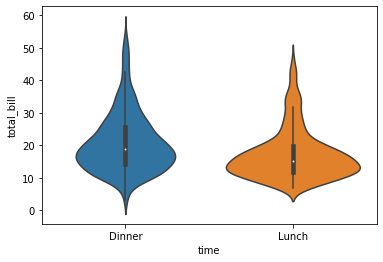

In [96]:
sns.violinplot(x='time', y='total_bill',data=tips)

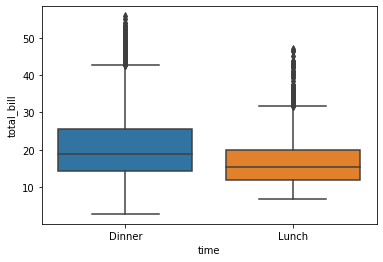

In [100]:
sns.boxplot(x='time', y='total_bill',data=tips)

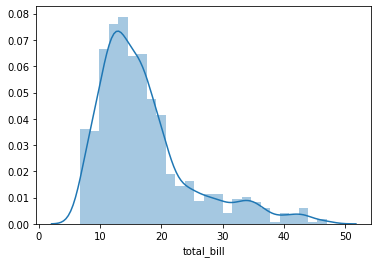

In [107]:
sns.distplot(tips.query('time == "Lunch"').total_bill)

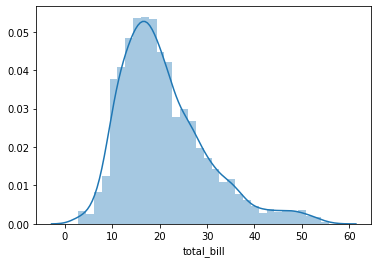

In [105]:
sns.distplot(tips.query('time == "Dinner"').total_bill)

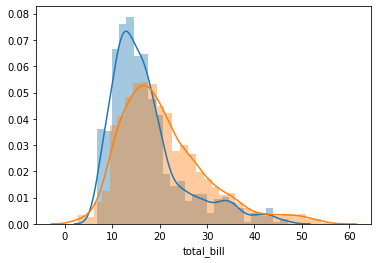

In [109]:
sns.distplot(tips.query('time == "Lunch"').total_bill)
sns.distplot(tips.query('time == "Dinner"').total_bill)

In [111]:
#Table with the percent mean by time
round(tips.groupby(['time']).mean()[['total_bill','tip','percent']],2)

,total_bill,tip,percent
time,,,
Dinner,20.83,2.78,14.89
Lunch,17.21,2.53,15.78


In [121]:
#Usind Wilcoxon rank-sum for compare distribution by time
if scipy.stats.ranksums(tips.query("time == 'Lunch'").percent, tips.query("time == 'Dinner'").percent).pvalue.round(3) <= 0.05:
    print('The value distribuition of Lunch and Dinner groups are distinct')
    
else:
    print('There is no difference between the value distribuition of Lunch and Dinner groups')


The value distribuition of Lunch and Dinner groups are distinct
